In [1]:
import os
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split

from modelwrappers import AbstractModel
from ts_utils import *

In [2]:
from statsforecast.models import (AutoTheta, 
                                AutoETS, 
                                AutoARIMA,
                                Theta,
                                OptimizedTheta,
                                DynamicTheta,
                                DynamicOptimizedTheta,)

/Users/biranyucel/miniconda3/envs/darts/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
data_sets = {}
for root, _, files in os.walk('datasets'):
    for file_name in files:
        if file_name.lower().endswith('.csv'):
            file_path = os.path.join(root, file_name)
            data_name = file_path.split('/')[-1].split('.csv')[0]
            data = pd.read_csv(file_path)
            if "y" in data.columns:
                data_p = AbstractModel.prepare_dataset(data, value_col=data.columns.tolist().index("y"))
            else:
                data_p = AbstractModel.prepare_dataset(data)
            period = get_seasonal_period(data_p["value"])
            models = {"AutoTheta": AutoTheta(season_length=period),
                      "AutoARIMA": AutoARIMA(season_length=period),
                      "AutoETS": AutoETS(season_length=period),
                      "Theta": Theta(season_length=period),
                      "OptimizedTheta": OptimizedTheta(season_length=period),
                      "DynamicTheta": DynamicTheta(season_length=period),
                      "DynamicOptimizedTheta": DynamicOptimizedTheta(season_length=period),
                     }
            data_sets[data_name] = {'data': data,
                                   'processed_data': data_p[["value"]],
                                   'period': period,
                                   'models': models}

In [4]:
for data_name, data in data_sets.items():
    print(data_name)
    display(data['processed_data'])

price_ercot_dam


,value
datetime,
2015-01-01 00:00:00,22.01
2015-01-01 01:00:00,21.39
2015-01-01 02:00:00,21.00
2015-01-01 03:00:00,20.72
2015-01-01 04:00:00,21.18
...,...
2017-11-29 20:00:00,24.97
2017-11-29 21:00:00,23.55
2017-11-29 22:00:00,22.41


power_solar_minutely


,value
datetime,
2019-08-01 00:00:00,0.0
2019-08-01 00:01:00,0.0
2019-08-01 00:02:00,0.0
2019-08-01 00:03:00,0.0
2019-08-01 00:04:00,0.0
...,...
2020-07-08 11:04:00,0.0
2020-07-08 11:05:00,0.0
2020-07-08 11:06:00,0.0


SF_hospital_load


,value
datetime,
2015-01-01 01:00:00,778.007969
2015-01-01 02:00:00,776.241750
2015-01-01 03:00:00,779.357338
2015-01-01 04:00:00,778.737196
2015-01-01 05:00:00,787.835835
...,...
2015-12-31 20:00:00,845.563081
2015-12-31 21:00:00,827.530521
2015-12-31 22:00:00,829.256300


elecdemand_dataset


,value
datetime,
2014-01-01 00:00:00,3.9146
2014-01-01 00:30:00,3.6725
2014-01-01 01:00:00,3.4975
2014-01-01 01:30:00,3.3391
2014-01-01 02:00:00,3.2043
...,...
2014-12-31 21:30:00,3.7248
2014-12-31 22:00:00,3.7619
2014-12-31 22:30:00,3.8094


power_wind_minutely


,value
datetime,
2019-08-01 00:00:00,18.7
2019-08-01 00:01:00,18.0
2019-08-01 00:02:00,17.2
2019-08-01 00:03:00,16.6
2019-08-01 00:04:00,15.9
...,...
2020-07-08 10:59:00,10.3
2020-07-08 11:00:00,10.3
2020-07-08 11:01:00,10.3


SF_PV


,value
datetime,
2015-01-01 01:00:00,0
2015-01-01 02:00:00,0
2015-01-01 03:00:00,0
2015-01-01 04:00:00,0
2015-01-01 05:00:00,0
...,...
2015-12-31 20:00:00,0
2015-12-31 21:00:00,0
2015-12-31 22:00:00,0


BeijingPM25_0


,value
datetime,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0
...,...
2014-12-31 19:00:00,8.0
2014-12-31 20:00:00,10.0
2014-12-31 21:00:00,10.0


retail_sales


,value
datetime,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068
...,...
2016-01-01,400928
2016-02-01,413554
2016-03-01,460093


air_passengers


,value
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


temp_anom_w_forcing


,value
datetime,
1970-01-01 00:00:00.000001850,-0.17
1970-01-01 00:00:00.000001851,-0.09
1970-01-01 00:00:00.000001852,-0.11
1970-01-01 00:00:00.000001853,-0.12
1970-01-01 00:00:00.000001854,-0.12
...,...
1970-01-01 00:00:00.000002008,0.55
1970-01-01 00:00:00.000002009,0.66
1970-01-01 00:00:00.000002010,0.73


temp_anom_monthly


,value
datetime,
1850-01-01,-0.39
1850-02-01,-0.14
1850-03-01,-0.25
1850-04-01,-0.21
1850-05-01,-0.21
...,...
2023-02-01,1.00
2023-03-01,1.23
2023-04-01,0.98


yosemite_temps


,value
datetime,
2017-05-01 00:00:00,27.8
2017-05-01 00:05:00,27.0
2017-05-01 00:10:00,26.8
2017-05-01 00:15:00,26.5
2017-05-01 00:20:00,25.6
...,...
2017-07-04 23:40:00,42.8
2017-07-04 23:45:00,43.0
2017-07-04 23:50:00,42.1


In [5]:
test_size = 0.25

In [6]:
# Take only one dataset for now
data_sets = {'air_passengers': data_sets['air_passengers']}

In [7]:
results = data_sets.copy() # data_sets
for data_name, data in results.items():
    y_train, y_test = train_test_split(data['processed_data'], test_size=test_size, shuffle=False)
    results[data_name]['test_size'] = test_size

    for model_name, model in data["models"].items():
        model_copy = copy.deepcopy(model)
        try:
            model_copy = model_copy.fit(y=y_train['value'].to_numpy())
            horizon = int(data['processed_data'].shape[0] * test_size)
            prediction = model_copy.predict(h=horizon)['mean']
            results[data_name][model_name + "_y_pred"] = prediction
            results[data_name][model_name + "_mape"] = mape(y_test, prediction)
            results[data_name][model_name + "_smape"] = smape(y_test, prediction)
            results[data_name][model_name + "_mase"] = mase(y_test, prediction, y_train)
        except:
            results[data_name][model_name + "_y_pred"] = np.nan
            results[data_name][model_name + "_mape"] = np.nan
            results[data_name][model_name + "_smape"] = np.nan
            results[data_name][model_name + "_mase"] = np.nan
    

In [8]:
res = pd.DataFrame(results)

In [9]:
res[res.index.str.contains("smape")]

,air_passengers
AutoARIMA_smape,18.090499
AutoETS_smape,NaN
AutoTheta_smape,17.663154
DynamicOptimizedTheta_smape,17.683425
DynamicTheta_smape,17.935527
OptimizedTheta_smape,17.663154
Theta_smape,17.920639


AutoETS model does not have prediction


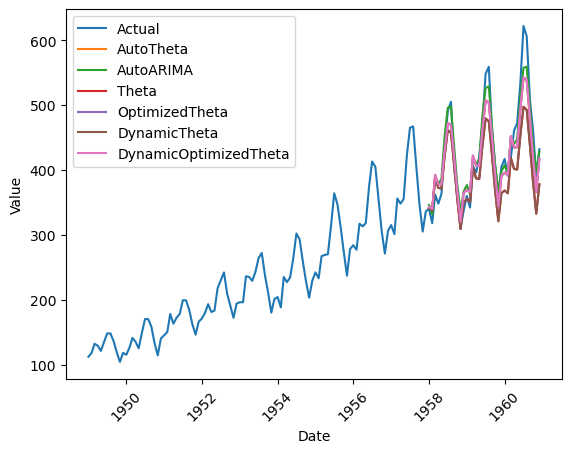

In [10]:
y_train, y_test = train_test_split(res.T.processed_data[0], test_size=test_size, shuffle=False)
plt.plot(res.T.processed_data[0].index, res.T.processed_data[0]["value"], label="Actual")
for model_name in res.T.models.values[0].keys():
    if type(res.T[model_name + "_y_pred"][0]) == np.ndarray:
        plt.plot(y_test.index, res.T[model_name + "_y_pred"][0], label=model_name)
    else:
        print("{} model does not have prediction".format(model_name))
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.legend()
plt.show()


In [11]:
res[res.index.str.contains("_smape")]

,air_passengers
AutoARIMA_smape,18.090499
AutoETS_smape,NaN
AutoTheta_smape,17.663154
DynamicOptimizedTheta_smape,17.683425
DynamicTheta_smape,17.935527
OptimizedTheta_smape,17.663154
Theta_smape,17.920639


In [12]:
res[res.index.str.contains("_mape")]

,air_passengers
AutoARIMA_mape,18.60687
AutoETS_mape,NaN
AutoTheta_mape,17.659295
DynamicOptimizedTheta_mape,17.689009
DynamicTheta_mape,16.994464
OptimizedTheta_mape,17.659295
Theta_mape,16.993288


In [13]:
res[res.index.str.contains("_mase")]

,air_passengers
AutoARIMA_mase,3.893047
AutoETS_mase,NaN
AutoTheta_mase,3.76184
DynamicOptimizedTheta_mase,3.766726
DynamicTheta_mase,3.7532
OptimizedTheta_mase,3.76184
Theta_mase,3.751137
